In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dt = pd.read_csv('data/sales_data_filter.csv')
dt.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Customer_Gender_Index,Age_Group_Index
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,1,3
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,1,3
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1,0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,1,0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,0,0


In [4]:
dt.shape

(104636, 20)

In [5]:
X = dt['Unit_Price'].values.reshape(-1,1)
y = dt['Unit_Cost'].values.reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

Nilai M dan B

In [8]:
print(model_lr.coef_)
print(model_lr.intercept_)

[[0.58737603]]
[-1.55168037]


Akurasi prediksi

In [9]:
model_lr.score(X_test, y_test)

0.9939053796636685

In [10]:
model_lr.score(X_train, y_train)

0.9939349308912522

Hasil Prediksi Unit Price 2000

In [11]:
res = model_lr.predict([[2000]])
res[0][0]

1173.20038683214

In [12]:
y_pred = model_lr.predict(X_test)
results = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(results)

       Actual   Predicted
0           1    0.797824
1           2    1.385200
2           8   10.783216
3          13   19.006481
4           1   -0.376928
...       ...         ...
20923       9   13.132720
20924       1   -0.376928
20925     713  656.309477
20926       3    3.147328
20927       2    1.385200

[20928 rows x 2 columns]


Calculating the MAE, MSE and RMSE metrics.

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 14.65
Mean squared error: 980.98
Root mean squared error: 31.32


<AxesSubplot: >

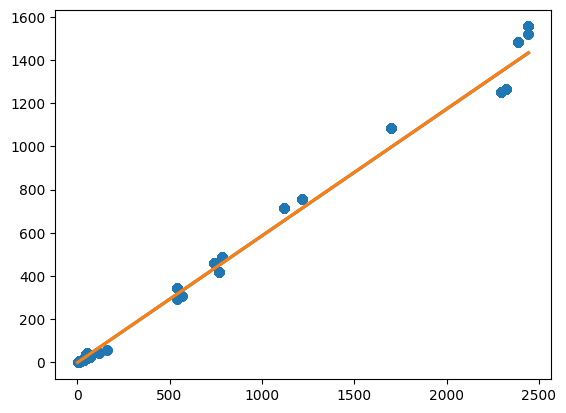

In [14]:
sns.regplot(x=X_test, y=y_test)
sns.regplot(x=X_test, y=y_pred, scatter=False)